* Set objective function to ATP minimization
* Set upper bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 (0.30 is max Rhodotorula growth rate)
* Print all fluxes, find biomass function and NADPH functions (in PPP): 'TALA'=Transaldolase, 'TKT1'=Transketolase, 'TKT2'=Transketolase, 'RPI'=Ribose-5-phosphate isomerase, 'G6PDH2rp'=Glucose 6-phosphate dehydrogenase, 'GND'=Phosphogluconate dehydrogenase, 'PGLp'=6-phosphogluconolactonase

* Make a graph where specific growth rate is on x-axis and the flux is on y-axis


In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [55]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")
# Changing the objective function
model.objective = "EX_glc__D_e" 
solution = model.optimize('minimize') # minimize the objective function

In [26]:
# Get growth media
# model.medium returns a dictionary that contains the upper flux 
# bounds for all active exchange fluxes (the ones having non-zero flux bounds
# You can modify a growth medium of a model by assigning a dictionary 
# to model.medium that maps exchange reactions to their respective upper import bounds:
# medium = model.medium
# medium["EX_o2_e"] = 0.0
# model.medium = medium

# Make it to a pd dataframe
growth_medium = pd.DataFrame(model.medium, index=['Upper flux bound'])
growth_medium

,EX_h_e,EX_h2o_e,EX_nh4_e,EX_o2_e,EX_pi_e,EX_so4_e,EX_glc__D_e,EX_ca2_e,EX_fe2_e,EX_fe3_e,EX_k_e,EX_na1_e,EX_mg2_e,EX_mn2_e,EX_cu2_e,EX_zn2_e
Upper flux bound,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,1.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0


In [56]:
model.reactions.EX_glc__D_e.bounds = -9999, 9999
model.reactions.BIOMASS_RT.bounds = 0.3, 0.3


In [57]:
# In some cases you might be interested in the smallest growth medium that can maintain a specific growth rate, 
# the so called “minimal medium”. For this we provide the function minimal_medium which by default obtains the 
# medium with the lowest total import flux. This function needs two arguments: the model and the minimum growth 
# rate (or other objective) the model has to achieve.

from cobra.medium import minimal_medium

max_growth = model.slim_optimize('minimize')
minimal_medium(model, max_growth)

EX_nh4_e       1.980088
EX_o2_e        8.789416
EX_pi_e        0.079864
EX_so4_e       0.030071
EX_glc__D_e    3.995137
EX_ca2_e       0.000250
EX_fe3_e       0.001851
EX_k_e         0.175711
EX_na1_e       0.007830
EX_mg2_e       0.018515
EX_mn2_e       0.000182
EX_cu2_e       0.000157
EX_zn2_e       0.000153
dtype: float64

In [41]:
solution

,fluxes,reduced_costs
ALCD25yi,0.0,0.000000
MTHFCm,0.0,-0.000000
AMPN,0.0,-0.003773
DAGCPTer_RT,0.0,0.000000
PYRt2,0.0,0.000000
...,...,...
FOLt,0.0,0.000000
NADtm,0.0,0.000000
EX_pydxn_e,0.0,-0.223369
PYDXNtr,0.0,0.000000


In [4]:
# Change bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30

GR_range= [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
df = pd.DataFrame(columns=['GR','TALA', 'TKT1', 'TKT2', 'RPI', 'G6PDH2rp', 'GND', 'PGLp'])

for i in range(len(GR_range)):
    model.reactions.BIOMASS_RT.bounds = GR_range[i], GR_range[i]
    model.objective = "ATPM" 
    solution = model.optimize('minimize')
    solution.objective_value
    GR_flux = solution.fluxes.BIOMASS_RT
    TALA_flux = solution.fluxes.TALA
    TKT1_flux = solution.fluxes.TKT1
    TKT2_flux = solution.fluxes.TKT2
    RPI_flux = solution.fluxes.RPI
    G6PDH2rp_flux = solution.fluxes.G6PDH2rp
    GND_flux = solution.fluxes.GND
    PGLp_flux = solution.fluxes.PGLp
    df.loc[i, 'GR'] = GR_flux
    df.loc[i, 'TALA'] =round(TALA_flux,2)
    df.loc[i, 'TKT1'] =round(TKT1_flux,2)
    df.loc[i, 'TKT2'] =round(TKT2_flux,2)
    df.loc[i, 'RPI'] =round(RPI_flux,2)
    df.loc[i, 'G6PDH2rp'] =round(G6PDH2rp_flux,2)
    df.loc[i, 'GND'] =round(GND_flux,2)
    df.loc[i, 'PGLp'] =round(PGLp_flux,2)    

print(df)

# Extract flux values
TALA_fluxes = df['TALA']
TKT1_fluxes = df['TKT1']
TKT2_fluxes = df['TKT2']
RPI_fluxes = df['RPI']
G6PDH2rp_fluxes = df['G6PDH2rp']
GND_fluxes = df['GND']
PGLp_fluxes = df['PGLp']


c:\Users\Maive\miniconda3\envs\bachelor_thesis\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.


     GR  TALA  TKT1  TKT2   RPI G6PDH2rp   GND PGLp
0   0.0   0.0 -0.61   0.0  0.61      0.0   0.0  0.0
1  0.05 -0.31 -0.31   0.0  0.22      0.0  0.13  0.0
2   0.1 -0.09 -0.09  -0.1 -0.09      0.0   0.0  0.0
3  0.15 -0.03 -0.03 -0.06 -0.23      0.0  0.14  0.0
4   0.2  0.08  0.08  0.04 -0.41      0.0  0.53  0.0
5  0.25  0.07  0.07  0.03 -0.49      0.0   0.6  0.0
6   0.3  0.58  0.16   0.1 -0.66      0.0  0.92  0.0


In [5]:
# Get all flux values
all_fluxes = solution.fluxes
print(all_fluxes)


ALCD25yi       0.00000
MTHFCm         0.00000
AMPN           0.00000
DAGCPTer_RT    0.00516
PYRt2          0.00000
                ...   
FOLt           0.00000
NADtm          0.00000
EX_pydxn_e     0.00000
PYDXNtr        0.00000
RIBFLVt2       0.00000
Name: fluxes, Length: 2398, dtype: float64


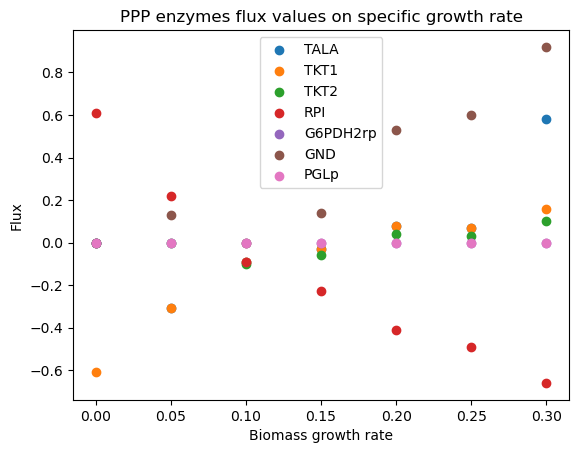

In [6]:
# Plot the flux values

x = GR_range
y = [TALA_fluxes, TKT1_fluxes, TKT2_fluxes, RPI_fluxes, G6PDH2rp_fluxes, GND_fluxes, PGLp_fluxes]
labels = ['TALA', 'TKT1', 'TKT2', 'RPI', 'G6PDH2rp', 'GND', 'PGLp']
# plt.plot(x1, y1, label='Plot 1')
for i in range(len(x)):
    plt.scatter(x, y[i], label=labels[i])

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title('PPP enzymes flux values on specific growth rate')
plt.legend()
plt.show()
